In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../data/data_cleaned.csv')
data.head()

,sales_person,country,product,date,amount,boxes_shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685,184


# Visualisation des donneés

Quels vendeurs ont les meilleurs bénéfices ?

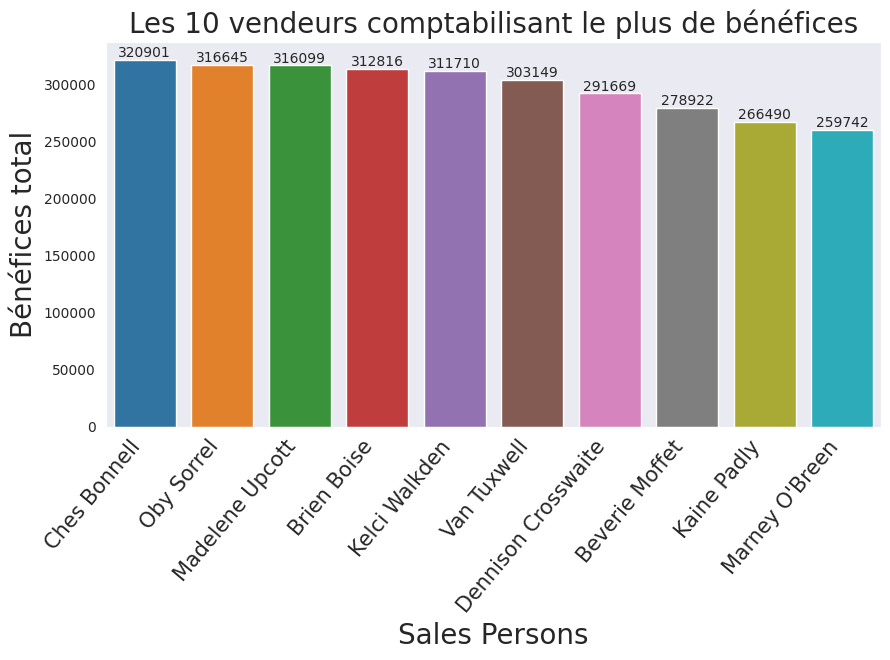

In [111]:
sales_persons = data.groupby('sales_person').agg(benef_total=('amount', 'sum')).sort_values('benef_total', ascending=False).head(10)

def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y.iloc[i, 0], y.iloc[i, 0], horizontalalignment='center', verticalalignment='bottom')

plt.figure(figsize=(10, 5))
plt.grid()

add_labels(sales_persons.index, sales_persons)
plt.xticks(fontsize=15, rotation=50, horizontalalignment='right')
plt.yticks(fontsize=10)

plt.title("Les 10 vendeurs comptabilisant le plus de bénéfices", fontsize=20)
plt.xlabel('Sales Persons', fontsize=20)
plt.ylabel('Bénéfices total', fontsize=20)

sns.barplot(sales_persons, x='sales_person', y='benef_total', palette='tab10', hue='sales_person')
plt.show()

### Y a-t-il une période dans l'année où il y a une hausse des ventes de chocolats ?

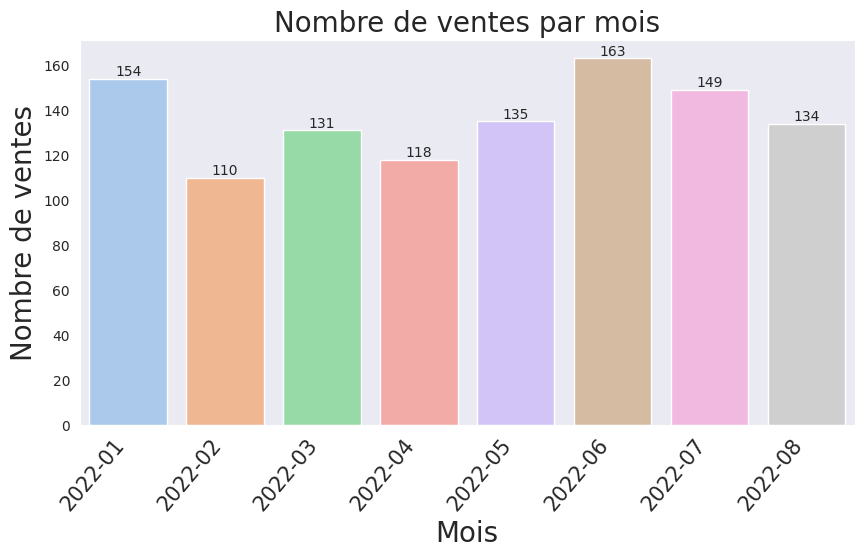

In [112]:
data['date'] = pd.to_datetime(data['date'])
dates = data.groupby(data['date'].dt.to_period('M')).agg(Nbr_ventes=('amount', 'count'))

def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y.iloc[i, 0], y.iloc[i, 0], horizontalalignment='center', verticalalignment='bottom')

plt.figure(figsize=(10, 5))
plt.grid()

add_labels(dates.index, dates)
plt.xticks(fontsize=15, rotation=50, horizontalalignment='right')
plt.yticks(fontsize=10)

plt.title("Nombre de ventes par mois", fontsize=20)
plt.xlabel('Mois', fontsize=20)
plt.ylabel('Nombre de ventes', fontsize=20)

sns.barplot(dates, x='date', y='Nbr_ventes', palette='pastel', hue='date')
plt.show()

### Y a-t-il des inégalités dans la quantité de chocolats expédiés à travers les différents pays ?

In [113]:
count_chocolate = data.groupby('country').agg(boxes_shipped=('boxes_shipped', 'sum'))
count_chocolate

,boxes_shipped
country,
Australia,32647
Canada,31221
India,29470
New Zealand,26580
UK,30265
USA,26824


Courbe de Lorenz

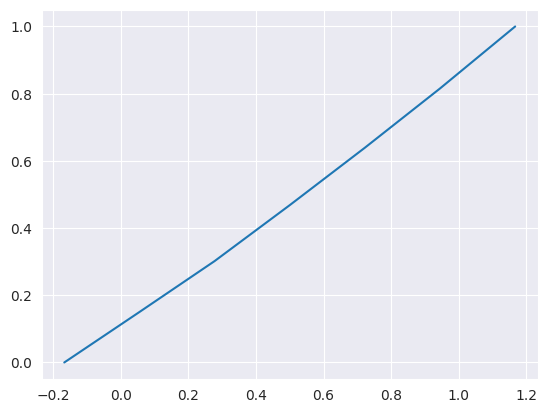

In [114]:
count = count_chocolate['boxes_shipped'].values
n = len(count)
lorenz = np.cumsum(np.sort(count)) / count.sum()
lorenz = np.append([0], lorenz)
xaxis = np.linspace(0-1/n, 1+1/n, n+1)
plt.plot(xaxis, lorenz)
plt.show()

##### L'indice de Gini

In [115]:
AUC = (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2) / n
gini = 2 * (0.5 - AUC)
print(gini)

0.04173187124426336


L'indice de gini étant très faible, on en déduit que les boîtes de chocolats sont expédiées de manière équitable entre les différents pays.